## The HIST.nc file

The `HIST.nc` file is contains the history of structural relaxations or molecular dynamics calculations.
One can use the `abiopen` function provide by `abilab` to open the file and generate an instance of `HistFile`.
Alteratively, one can use the `abiopen.py` script to open the file inside the shell with the syntax:

    abiopen.py out_HIST.nc 
    
This command will start the ipython interpreter so that one can interact directly with the `HistFile` object (named `abifile` inside ipython).
To generate a jupyter notebook use:

    abiopen.py out_HIST.nc -nb

In [1]:
from __future__ import print_function
%matplotlib notebook

import seaborn  # Activate seaborn settings (optional)

from abipy import abilab
import abipy.data as abidata

In [2]:
hist = abilab.abiopen(abidata.ref_file("sic_relax_HIST.nc"))
print("Number of iterations performed:", hist.num_steps)

Number of iterations performed: 7


`hist.structures` is the list of structure objects at the different iteration steps.
`hist.etotals` is a numpy array with the total energies in eV associated to the different steps.

In [3]:
for struct, etot in zip(hist.structures, hist.etotals):
    print("Volume:", struct.volume,", Etotal:", etot)

Volume: 20.3514385184 , Etotal: -285.487700315
Volume: 20.4091584532 , Etotal: -285.489001015
Volume: 20.3833051267 , Etotal: -285.48909201
Volume: 20.3569371356 , Etotal: -285.489125233
Volume: 20.3560149376 , Etotal: -285.489125416
Volume: 20.3517927732 , Etotal: -285.489124971
Volume: 20.355222213 , Etotal: -285.489125441


To get the last structure stored in the `HIST.nc` file:

In [4]:
print(hist.final_structure)

Full Formula (Si1 C1)
Reduced Formula: SiC
abc   :   3.064763   3.064763   3.064763
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a     b      c  cartesian_forces
---  ----  -----  ----  -----  -----------------------
  0  C     -0     0     -0     [-0. -0. -0.] eV ang^-1
  1  Si     0.25  0.25   0.25  [-0. -0. -0.] eV ang^-1


To plot the evolution of the structural parameters with `matplotlib`:

<IPython.core.display.Javascript object>


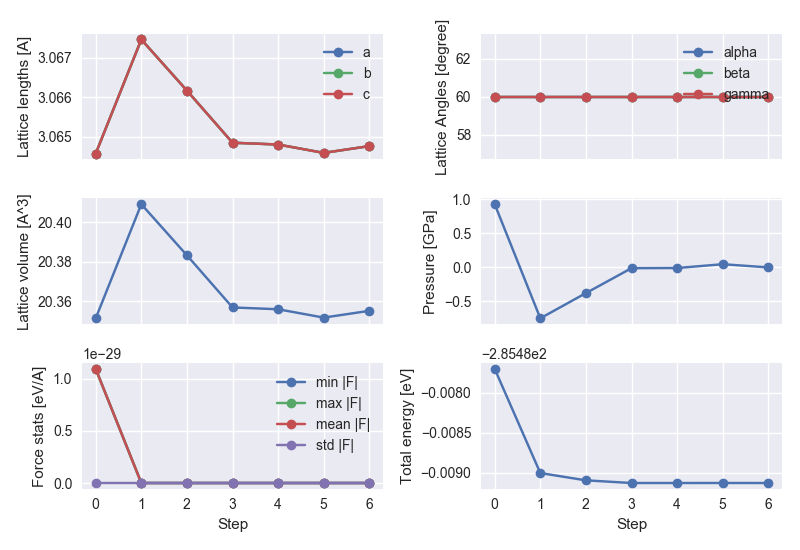

In [5]:
hist.plot(tight_layout=True);

To plot the total energies at the different iterations steps:

<IPython.core.display.Javascript object>


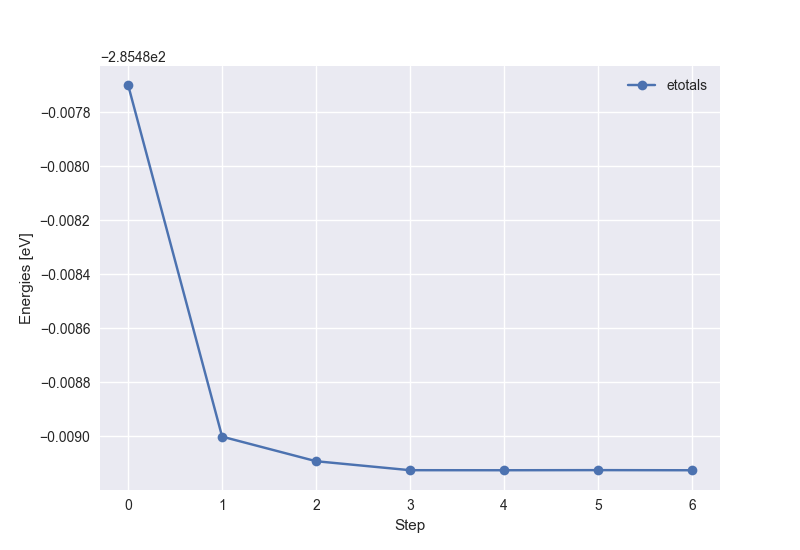

In [6]:
hist.plot_energies();